In [29]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib.pyplot import figure
#wtyczka do Visual Studio Code do tabel: Data Table Renderers

In [30]:
# https://corgis-edu.github.io/corgis/csv/billionaires/

bill_data = pd.read_csv('billionaires.csv')
bill_data

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,Wu Chung-Yi,1565,2014,1991,Tingyi,investor,beverages and food,new,55,male,...,0.000000e+00,East Asia,executive,1.0,Traded Sectors,True,Non-consumer industrial,not inherited,True,True
2610,Wu Xiong,1565,2014,1999,Biostime International Holdings,owner,infant formula,new,0,male,...,0.000000e+00,East Asia,executive,1.0,Traded Sectors,True,Consumer,not inherited,True,True
2611,Yang Keng,1565,2014,0,Blue Ray Corp,chairman,real estate,new,53,male,...,0.000000e+00,East Asia,self-made finance,1.0,Financial,True,Real Estate,not inherited,True,True
2612,Zdenek Bakala,1565,2014,1994,Patria Finance,founder,coal,new,53,male,...,0.000000e+00,Europe,privatized and resources,1.0,Resource Related,True,Mining and metals,not inherited,True,True


Ile różnych osób zostało wpisanych do tabeli

In [31]:
bill_data.name.unique().size

2077

Lista najbogatszych ludzi w najbardziej odległym roku, który rozważa tabela

In [32]:
bill_data.year.min()

1996

In [33]:
bill_data.loc[(bill_data.year == bill_data.year.min())].head(10)[['rank', 'name', 'company.name', 'company.sector', 'demographics.age', 'wealth.how.was political', 'wealth.worth in billions']]

,rank,name,company.name,company.sector,demographics.age,wealth.how.was political,wealth.worth in billions
0,1,Bill Gates,Microsoft,Software,40,True,18.5
3,2,Warren Buffett,Berkshire Hathaway,Finance,65,True,15.0
6,3,Oeri Hoffman and Sacher,F. Hoffmann-La Roche,pharmaceuticals,0,True,13.1
9,4,Lee Shau Kee,Henderson Land Development,real estate,68,True,12.7
12,5,Tsai Wan-lin,Lin Yuan Group,banking and insurance,71,True,12.2
15,6,Walter Thomas and Raymond Kwok,Sun Hung Kai Properties,real estate,0,True,11.2
19,7,Li Ka-shing,Cheung king,real estate,67,True,10.6
21,8,Yoshiaki Tsutsumi,Seibu Corporation,real estate,61,True,9.2
24,9,Theo and Karl Albrecht,Aldi Nord,groceries,0,True,9.0
27,10,Hans and Gad Rausing,Tetra Pak,food packaging,0,True,9.0


Lista najbogatszych ludzi najbliższa teraźniejszości

In [34]:
bill_data.year.max()

2014

In [35]:
bill_data.loc[(bill_data.year == bill_data.year.max())].head(10)[['rank', 'name', 'company.name', 'company.sector', 'demographics.age', 'wealth.how.was political', 'wealth.worth in billions']]

,rank,name,company.name,company.sector,demographics.age,wealth.how.was political,wealth.worth in billions
2,1,Bill Gates,Microsoft,Software,58,True,76.0
5,2,Carlos Slim Helu,Telmex,Communications,74,True,72.0
8,3,Amancio Ortega,Zara,Fashion,77,True,64.0
11,4,Warren Buffett,Berkshire Hathaway,Finance,83,True,58.2
14,5,Larry Ellison,Oracle,software,69,True,48.0
17,6,Charles Koch,Koch industries,Oil refining,78,True,40.0
18,6,David Koch,Koch industries,Oil refining,73,True,40.0
23,8,Sheldon Adelson,Las Vegas Sands,casinos,80,True,38.0
26,9,Christy Walton,Walmart,retail,59,True,36.7
30,10,Jim Walton,Walmart,retail,66,True,34.7


Lista 10 najbogatszych ludzi na świecie i ich minimalny oraz maksymalny majątek

In [36]:
agg_bill_data = bill_data.groupby(['rank', 'name']).agg(minimum_money = ('wealth.worth in billions', np.min), maximum_money = ('wealth.worth in billions', np.max))
agg_bill_data.head(10)

minimum_money  maximum_money
rank name                                                 
1    Bill Gates                        18.5           76.0
2    Carlos Slim Helu                  72.0           72.0
     Warren Buffett                    15.0           32.3
3    Amancio Ortega                    64.0           64.0
     Oeri Hoffman and Sacher           13.1           13.1
     Paul Allen                        30.4           30.4
4    Larry Ellison                     26.0           26.0
     Lee Shau Kee                      12.7           12.7
     Warren Buffett                    58.2           58.2
5    Larry Ellison                     48.0           48.0

Histogram najbogatszych ludzi w 2014 w zależności od obszaru geograficznego

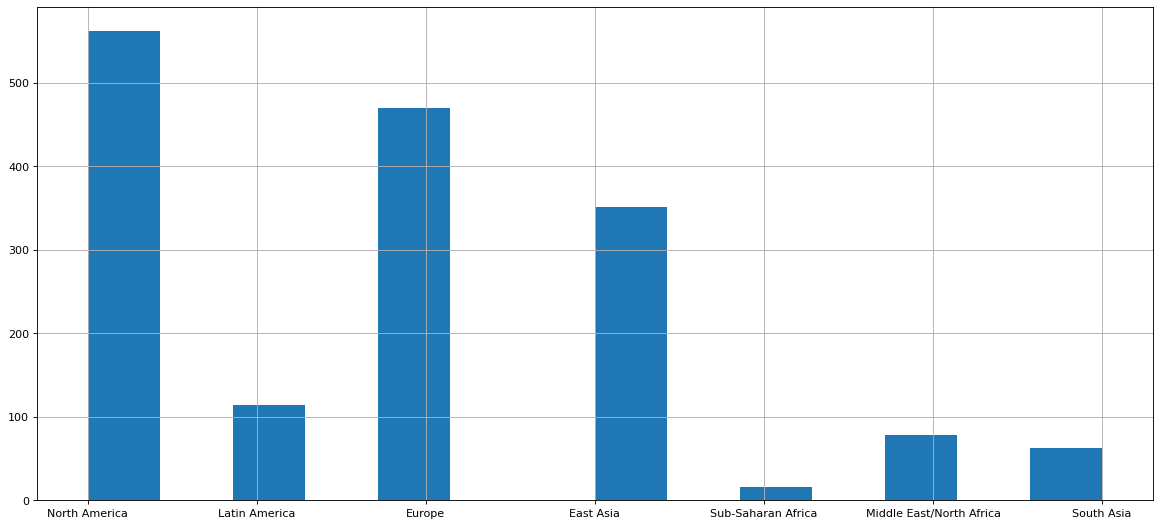

In [51]:
figure(figsize=(18, 8), dpi=80)
plt = bill_data.loc[(bill_data.year == bill_data.year.max())]["location.region"].hist(bins=14)#by = bill_data["location.region"])